<a href="https://colab.research.google.com/github/Jk-Krishna/Netflix-Analysis-Predictions-Local-LLM/blob/main/Netflix_Analysis_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv("/content/netflix_titles.csv")
netflix.shape

(8807, 12)

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix['country'].fillna('Unknown', inplace=True)
netflix['rating'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-3979164651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3979164651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
netflix.drop('date_added', axis=1, inplace=True)
netflix.drop('release_year', axis=1, inplace=True)

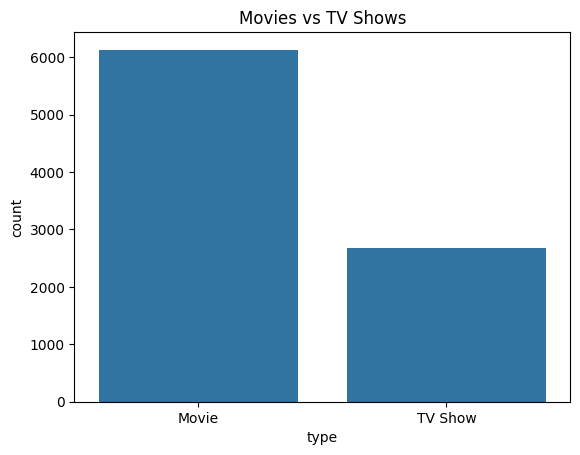

In [ ]:
sns.countplot(data=netflix, x='type')
plt.title('Movies vs TV Shows')
plt.show()

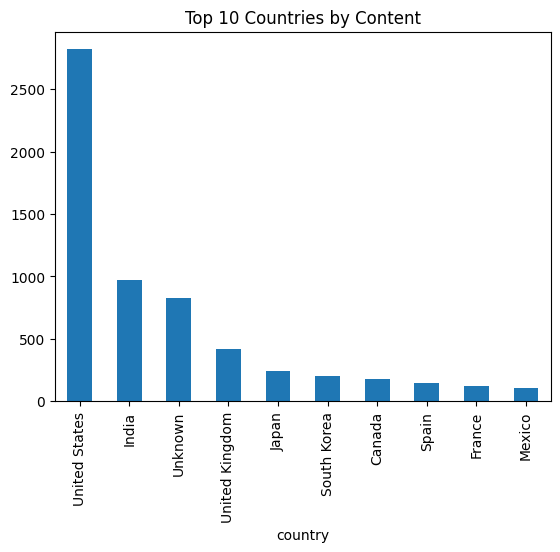

In [ ]:
top_countries = netflix['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Content')
plt.show()

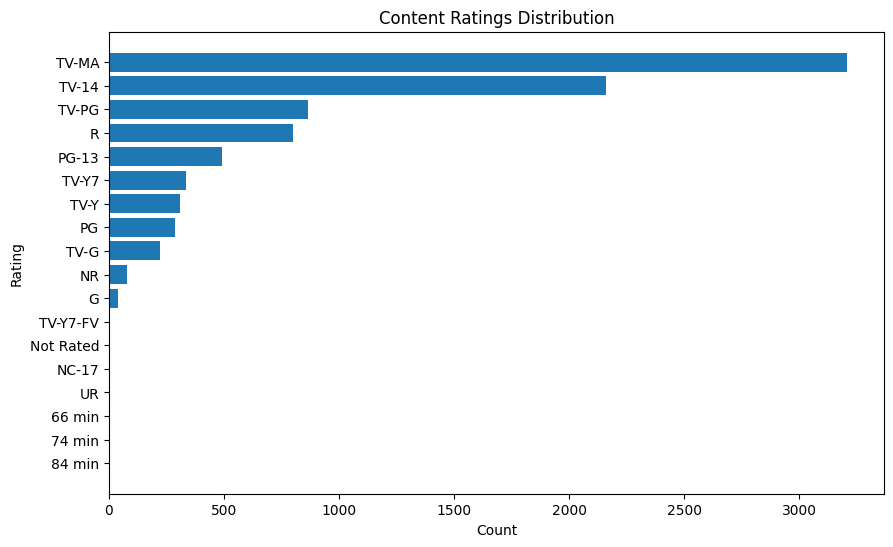

In [ ]:
rating_counts = netflix['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(rating_counts.index, rating_counts.values)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Content Ratings Distribution')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
netflix['type'] = le.fit_transform(netflix['type'])
X = netflix[['duration', 'rating', 'country']]
y = netflix['type']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("RandomForestClassifire Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Training accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))

RandomForestClassifire Accuracy: 0.9290578887627696
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1214
           1       0.82      1.00      0.90       548

    accuracy                           0.93      1762
   macro avg       0.91      0.95      0.92      1762
weighted avg       0.94      0.93      0.93      1762

Training accuracy: 1.0
Test accuracy: 0.9290578887627696


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("Training accuracy:", log_model.score(x_train, y_train))
print("Test accuracy:", log_model.score(x_test, y_test))

Logistic Regression Accuracy: 0.9824063564131669
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1214
           1       0.98      0.97      0.97       548

    accuracy                           0.98      1762
   macro avg       0.98      0.98      0.98      1762
weighted avg       0.98      0.98      0.98      1762

Training accuracy: 0.9865152590489709
Test accuracy: 0.9824063564131669


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print("Training accuracy:", knn.score(x_train, y_train))
print("Test accuracy:", knn.score(x_test, y_test))

KNN Accuracy: 0.7604994324631101
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      1214
           1       0.57      0.97      0.72       548

    accuracy                           0.76      1762
   macro avg       0.77      0.82      0.75      1762
weighted avg       0.85      0.76      0.77      1762

Training accuracy: 0.8044002838892832
Test accuracy: 0.7604994324631101


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("netflix_titles.csv")
df.drop(['date_added','release_year'], axis=1, inplace=True, errors='ignore')
df['description'].fillna('', inplace=True)
df['type'] = LabelEncoder().fit_transform(df['type'])  # Movie=1, TV Show=0

X = df['description']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape, len(y_train))

(7045, 5000) 7045


/tmp/ipython-input-451986877.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)

y_pred = lr_model.predict(X_test_tfidf)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7502837684449489
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1214
           1       0.76      0.29      0.42       548

    accuracy                           0.75      1762
   macro avg       0.75      0.62      0.63      1762
weighted avg       0.75      0.75      0.71      1762



In [ ]:
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier

model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_emb = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/221 [00:00<?, ?it/s]

Batches:   0%|          | 0/56 [00:00<?, ?it/s]

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_emb, y_train.values)

y_pred_emb = clf.predict(X_test_emb)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy with embeddings:", accuracy_score(y_test, y_pred_emb))
print(classification_report(y_test, y_pred_emb))


Accuracy with embeddings: 0.7179341657207718
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1214
           1       0.92      0.10      0.18       548

    accuracy                           0.72      1762
   macro avg       0.81      0.55      0.51      1762
weighted avg       0.78      0.72      0.63      1762



In [ ]:
def predict_from_description(description):
    description = str(description)
    emb = model.encode([description])
    pred = clf.predict(emb)[0]
    return "Movie" if pred == 1 else "TV Show"

In [ ]:
print(predict_from_description(
    "A wonderful joy adventure ride of a very close group of friends, exploring various worlds, places, fightings with ultimate boss. Beautiful story and direction"
))

Movie


In [ ]:
!pip install sentence-transformers faiss-cpu transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 29.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.drop(['date_added','release_year'], axis=1, inplace=True, errors='ignore')
df['description'].fillna('', inplace=True)
df['type'] = df['type'].str.lower().map({'movie':1, 'tv show':0})

descriptions = df['description'].tolist()
labels = df['type'].tolist()


/tmp/ipython-input-776070431.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

embed_model = SentenceTransformer('all-MiniLM-L6-v2')
desc_vectors = embed_model.encode(descriptions, show_progress_bar=True)
desc_vectors = np.array(desc_vectors).astype('float32')


Batches:   0%|          | 0/276 [00:00<?, ?it/s]

In [ ]:
import faiss

dimension = desc_vectors.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(desc_vectors)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(desc_vectors, labels, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Optional: check accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Classifier Accuracy:", accuracy_score(y_test, y_pred))


Classifier Accuracy: 0.7236095346197503


In [ ]:
from transformers import pipeline


generator = pipeline('text-generation', model='distilgpt2')


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def free_rag_predict(description):

    user_emb = embed_model.encode([description]).astype('float32')


    D, I = index.search(user_emb, 3)
    retrieved = [descriptions[i] for i in I[0]]

    pred = clf.predict(user_emb)[0]
    pred_label = "🎬 Movie" if pred==1 else "📺 TV Show"


    context = " ".join(retrieved)
    prompt = f"Description: {description}\nSimilar descriptions: {context}\nQuestion: Is this a Movie or TV Show? Explain reasoning briefly."
    explanation = generator(prompt, max_length=100, do_sample=True)[0]['generated_text']

    return pred_label, explanation


In [ ]:
while True:
    user_input = input("\nEnter Netflix description (or 'exit' to quit):\n")
    if user_input.lower() == "exit":
        break
    label, explanation = free_rag_predict(user_input)
    print("\nPrediction:", label)
    print("Explanation:", explanation)



Enter Netflix description (or 'exit' to quit):
new story, new adventure, fantastic, no lag in any of the story episode


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Prediction: 📺 TV Show
Explanation: Description: new story, new adventure, fantastic, no lag in any of the story episode
Similar descriptions: A variety-show production trips up big time when the cast members take their roles to new heights, and the line between fact and fiction blurs. Mini-Wolf and his fun-loving pals friends are always on the look out for a new adventure – even if it includes a little bit of mischief. Little animals embark on big adventures across the U.S. in a dramatic nature series that explores their hidden worlds and epic survival stories.
Question: Is this a Movie or TV Show? Explain reasoning briefly., including a young man and a young woman.
What a fascinating and entertaining, all-around adventure for the characters.
How the cast of the show works is a little tricky. One of the most interesting parts of the story is that each character seems to be a member of his family. They often turn out to be very different. It's a tough question to answer, but as a resul